<a href="https://colab.research.google.com/github/Wainer1999/Sales_Project/blob/main/Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O presente projeto tem como objetivo realizar a análise de uma base de dados de vendas. Tal análise será dividida em duas partes:
- Análise exploratória dos dados, onde serão utilizados as bibliotecas, "Pandas, Seaborn, Matplotlib e Numpy";
- Predição de valores: nesta etapa será aplicado um algoritmo de regressão linear para efetuar a predição dos valores de vendo, com base nas demais features. 


Primeiro passo será a importação das bibliotecas necessárias para a realização da análise exploratória 


O arquivo csv utilizado neste projeto encontra-se no site "https://www.kaggle.com/tylermorse/retail-business-sales-20172019?select=business.retailsales.csv"

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt


Agora será realizado a importação da base de dados utlizada na análise.
O data_frame será alocado na variável "df"

In [2]:
df = pd.read_csv('business.retailsales.csv')

In [ ]:
df.head()

,Product Type,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
0,Art & Sculpture,34,14935.0,-594.00,-1609.0,12732.00
1,Basket,13,3744.0,-316.80,0.0,3427.20
2,Basket,12,3825.0,-201.60,-288.0,3335.40
3,Basket,17,3035.0,-63.25,0.0,2971.75
4,Art & Sculpture,47,2696.8,-44.16,0.0,2652.64


O presente DataFrame possui as seguintes colunas:
- Product Type : tipo de produto;
- Net Quantity : quantidade daquele produt;
- Gross Sales: vendas brutas;
- Discounts : discontos;
- Returns : produtos retornados; 
- Total Net Sales: vendas líquidas totais. 

Agora vamos analisar algumas informações a respeito do DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


Nota-se que há valores faltantes na coluta "Product Type". Uma maneira de lidar com os dados faltantes neste caso, visto que temos uma string, é substituir os dados faltante pela maioria dos dados presentes.

Para saber qual a maioria dos dados presentes na coluna "Product Type", utilizamos a expressão "value_counts()" na coluna.

In [ ]:
df['Product Type'].value_counts()

Basket              551
Art & Sculpture     337
Jewelry             210
Kitchen             161
Home Decor          131
Christmas            73
Soapstone            67
Kids                 63
Accessories          39
Music                29
Fair Trade Gifts     28
Recycled Art         23
Furniture            16
Textiles             14
One-of-a-Kind        12
Skin Care            11
Easter                1
Gift Baskets          1
Name: Product Type, dtype: int64

A maior categoria de produto é "Basket", logo este será o tipo de produto que será utilizado para subtituir os dados faltantes da coluna. 

In [ ]:
df['Product Type'].replace(np.nan,'Basket',inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1775 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB


Agora todas as colunas possuem as mesmas quantidades de dados.



Uma maneira para começar uma análise preditiva é através da descrição estatistica dos valores númericos presentes na base de dados.

Utilizando o método "describe()" obtemos tais informações.

In [ ]:
df.describe()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,3.712676,199.671746,-6.317623,-5.385437,187.968687
std,6.243078,464.880638,20.903517,46.654269,414.547039
min,-1.000000,0.000000,-594.000000,-1609.000000,-106.250000
25%,1.000000,48.000000,-6.000000,0.000000,44.800000
50%,2.000000,100.000000,0.000000,0.000000,96.000000
75%,4.000000,185.500000,0.000000,0.000000,184.750000
max,96.000000,14935.000000,0.000000,0.000000,12732.000000


Agora será utilizado o método "groupby" para agrupar os dados categoricos, neste caso o "Product Type" e encontrar alguns valores médios de acordo com cada categoria. 

In [ ]:
df_2 = df[['Product Type','Gross Sales','Total Net Sales']]

In [ ]:
df_2.groupby('Product Type').mean().sort_values(by= ['Total Net Sales'],ascending = False)

,Gross Sales,Total Net Sales
Product Type,,
Art & Sculpture,268.001780,250.685015
Basket,261.008167,244.630472
Skin Care,237.227273,233.800000
Christmas,212.000000,198.093288
Home Decor,206.981298,196.183130
One-of-a-Kind,181.666667,175.667500
Recycled Art,164.904348,161.050435
Jewelry,147.847619,140.823571
Textiles,134.928571,119.935714


Agrupando valores para se saber qual obteve os maiores retornos e maiores quantidades.

In [ ]:
df_3 = df[['Product Type','Discounts','Returns']]

In [ ]:
df_3.groupby('Product Type').mean().sort_values(by = ['Discounts'], ascending = True)

,Discounts,Returns
Product Type,,
Furniture,-10.565000,0.000000
Art & Sculpture,-8.770979,-8.545786
Basket,-8.201109,-7.942200
Textiles,-8.064286,-6.928571
Home Decor,-7.566489,-3.231679
One-of-a-Kind,-5.999167,0.000000
Christmas,-4.728630,-9.178082
Jewelry,-4.599286,-2.424762
Recycled Art,-3.853913,0.000000


Visualizando as correlações:

Uma maneira de saber como os dados estão inter-relacionados, é através das correlações. 
Ou seja, o quanto que uma variável influencia em outra. Quanto mais proximo do 1 ou do -1 o valor chegar, mais "forte" é a correlação.

In [ ]:
df.corr()

,Net Quantity,Gross Sales,Discounts,Returns,Total Net Sales
Net Quantity,1.000000,0.467464,-0.318734,-0.132924,0.493191
Gross Sales,0.467464,1.000000,-0.852152,-0.725444,0.996805
Discounts,-0.318734,-0.852152,1.000000,0.590271,-0.838764
Returns,-0.132924,-0.725444,0.590271,1.000000,-0.671219
Total Net Sales,0.493191,0.996805,-0.838764,-0.671219,1.000000


Visualizando a correlação através de uma mapa de calor

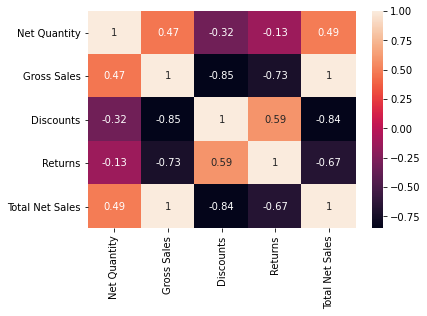

In [ ]:
sns.heatmap(df.corr(),annot=True)

Como dito anteriormente, uma das parte deste projeto involve a visualização dos dados e posteriormente a aplicação de uma algoritmo de regressão linear, com o objetivo de predizer valores. 

Será utilizada a biblioteca "Seaborn" para a visualização da linearidade dos dados. 

Como o objetivo final é predizer o "Total Net Sales" (vendas líquidas totais), o y dos graficos será a variavel alvo da predição. 

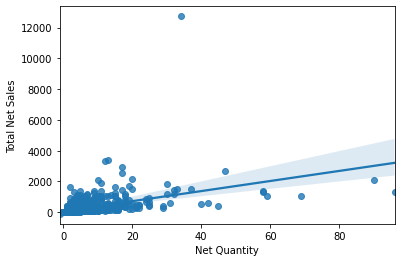

In [ ]:
sns.regplot(x='Net Quantity',y = "Total Net Sales", data=df)

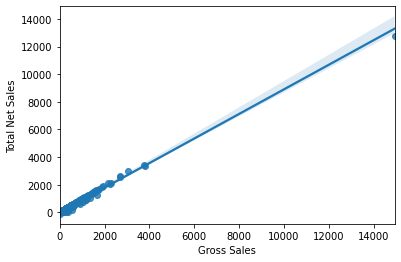

In [ ]:
sns.regplot(x='Gross Sales',y = "Total Net Sales", data=df)

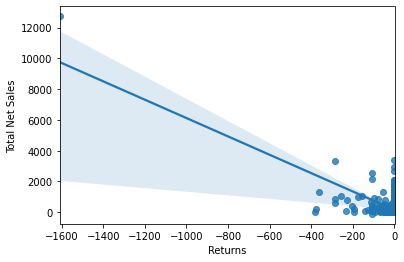

In [ ]:
sns.regplot(x='Returns',y = "Total Net Sales", data=df)

Contagem de variáveis

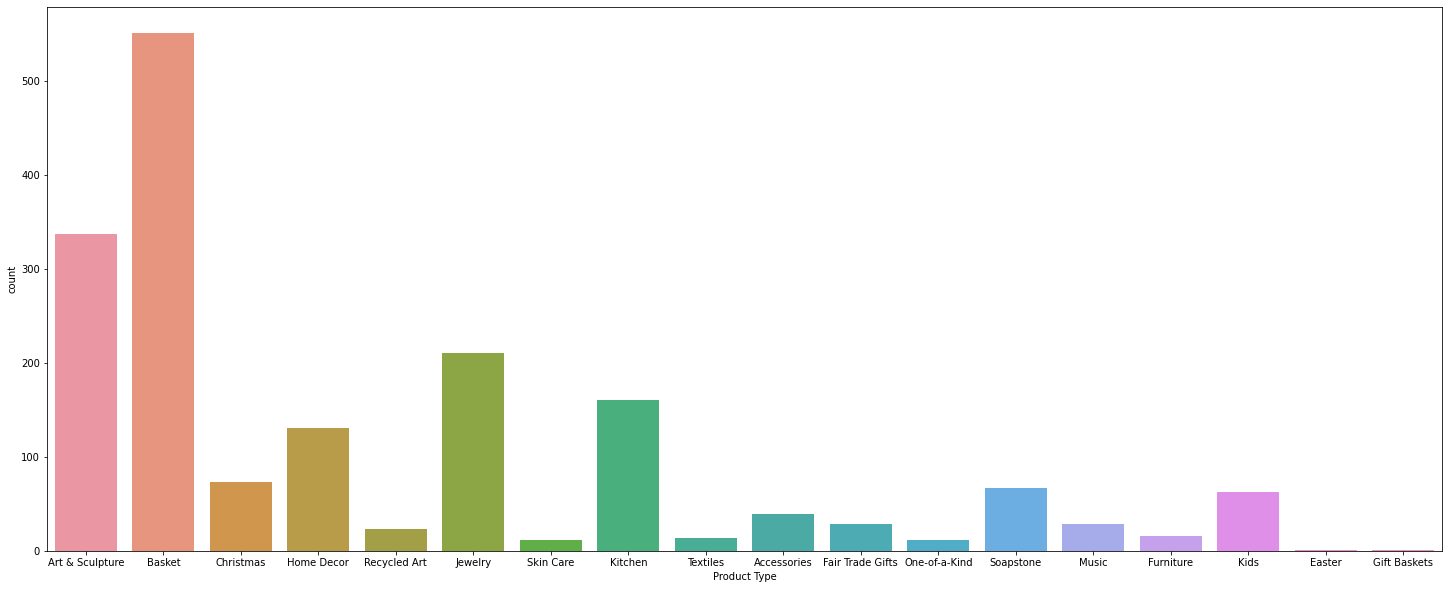

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='Product Type',data=df)

Aplicação do algoritmo de Regressão Linear, utilizando a biblioteca Scikit-learn. 


Separando os dados de treino e teste, e definindo o X e Y. 
Como dito no início do projeto, o foco deste algoritmo é a projeção dos dados de "Total Net Sales"

In [3]:
df.columns

Index(['Product Type', 'Net Quantity', 'Gross Sales', 'Discounts', 'Returns',
       'Total Net Sales'],
      dtype='object')

In [4]:
x = df[['Net Quantity', 'Gross Sales', 'Discounts', 'Returns']]

In [6]:
y = df['Total Net Sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=101)

Após o "split" dos dados de teste e treino. Será realizado a importação da modulo de Regressão Linerar do Scikit-learn, instanciamento da classe "LinearRegression" e "fitagem" do modelo


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(lm.coef_)

[4.54487773e-14 1.00000000e+00 1.00000000e+00 1.00000000e+00]


In [20]:
predict = lm.predict(x_test)

Após saber-se os coeficientes da regressão. Será realizado a validação da predição do modelo com base nos dados existeste no Data Frame. 
Será utilizado os dados da primeira linha do Data Frame(df) para avaliar se a predição será correta.

De acordo com a primeira linha do df, o "Total Net Sales" será de 12732.00.

In [16]:
df.iloc[0]

Product Type       Art & Sculpture
Net Quantity                    34
Gross Sales                  14935
Discounts                     -594
Returns                      -1609
Total Net Sales              12732
Name: 0, dtype: object

In [17]:
lm.predict([[34,14935.0,-594.00,-1609.0	]])

array([12732.])

Validação gravifa do modelo através do "scatterplot"

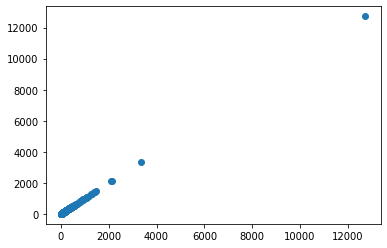

In [18]:
plt.scatter(y_test,predict)

Validando a acuracia do modelo através das métricas do Scikit-learn.

In [19]:
from sklearn import metrics

In [21]:

print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 1.134755204123323e-13
MSE: 5.906208824721868e-26
RMSE: 2.430269290577048e-13
